# Telco Churn

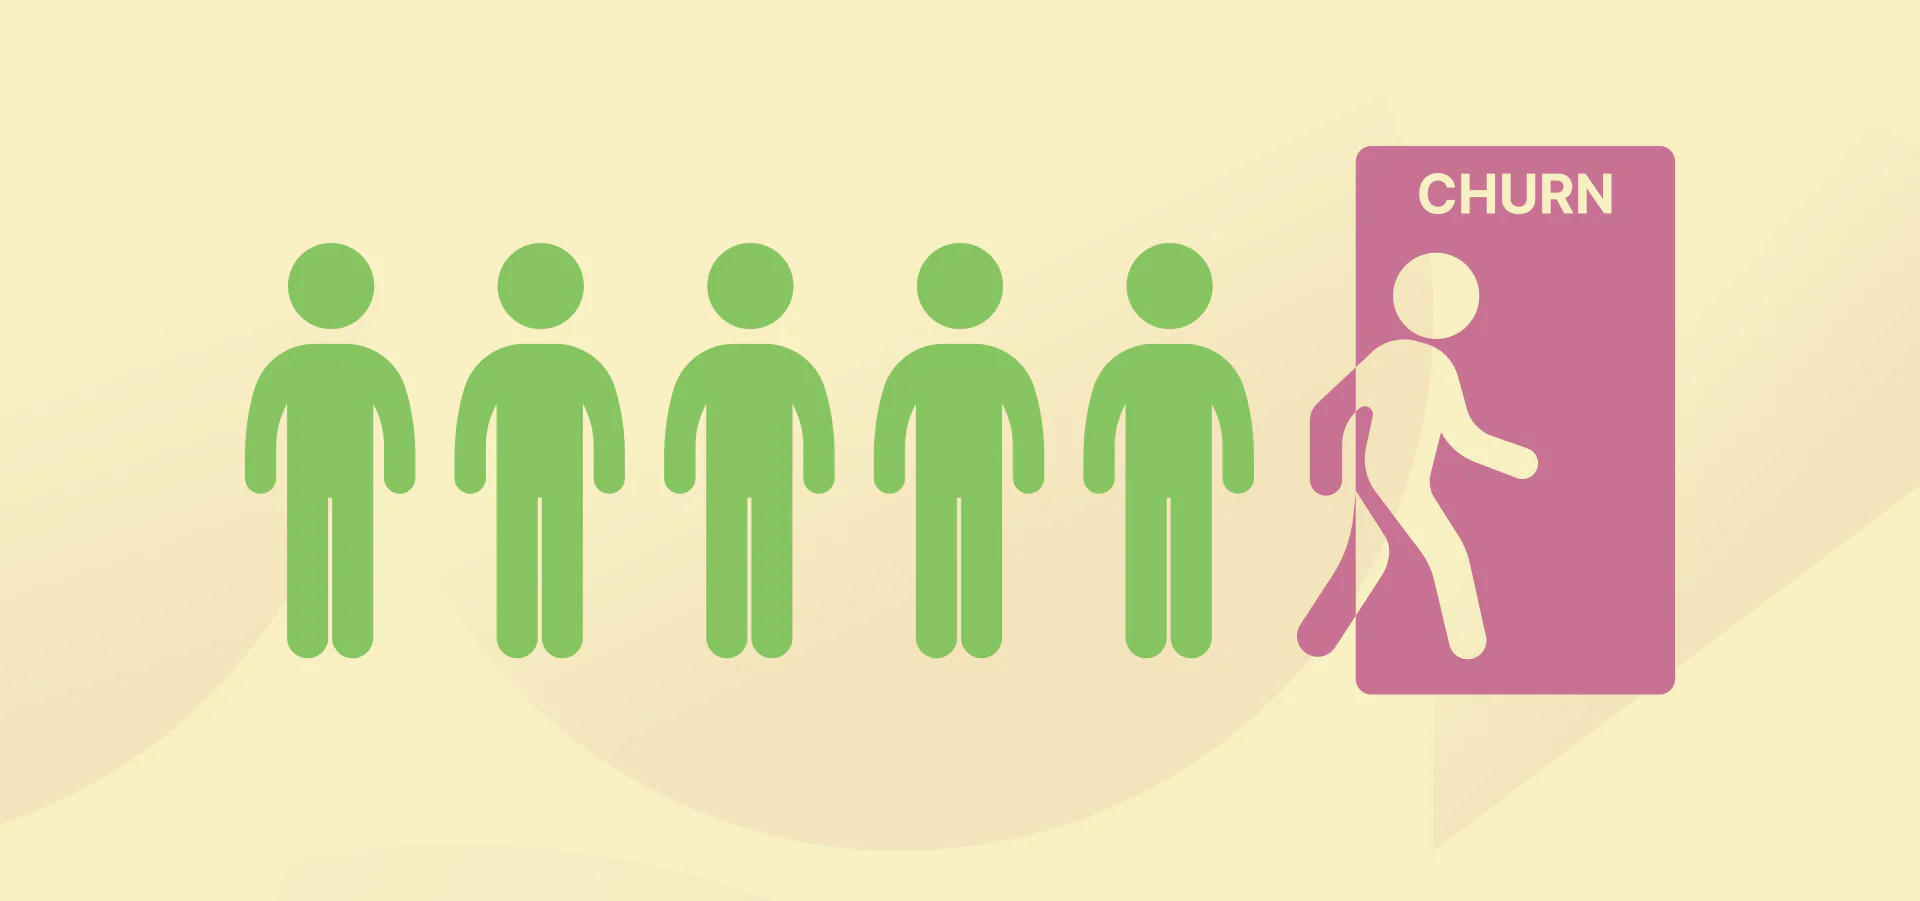

# About Dataset

**Business Problem**

A machine learning model that can predict customers who might leave the company
development is desirable.

**Dataset Story**

Telco churn data revealed fictitious home phone and Internet services to 7,043 California customers in the third quarter.
Contains information about a telecom company. Which customers have left, stayed or signed up for their service
shows.

1-customerID: It is the number that is unique to each customer. It does not give us any information about whether to leave or not!!!

2-gender: we can look at gender data

3-SeniorCitizen: information was given about the old age status of the customer (1,0)

4-Partner: Information has been given about whether the customer lives with someone (yes, no)

5-Dependents: The dependents of the customer are mentioned (Yes, No)

6-tenure : is the length of commitment!!

7-Phone Service: Information about whether the customer receives phone service (Yes, No)

8-MultipLines: Does the customer have more than one line or not (Yes, No, No Telephone service)

9-InternetService: provides information about the customer's internet provider

10-OnlineSecurity: Whether the customer has online security (Yes, No, no Internet service)
    
11-DeviceProtection : whether the customer has device protection

12-TechSupport: Whether the customer has technical support (Yes, No, no Internet service),

13-StreamingTV: Whether the customer has a broadcast TV (Yes, No, no Internet service),

14-StreamingMovies : Whether the customer is streaming movies (Yes, No, no internet service),

15-Contract: Customer's contract period (Month to month, One)
    
16-PaperlessBilling: Whether the customer has a paperless invoice (Yes, No),

17-PaymentMethod: Customer's payment method (Electronic check, Postal check, Bank transfer (automatic), Credit card (automatic)),

18-MonthlyCharges: The monthly amount collected from the customer,

19-TotalCharges: The total amount collected from the customer,

20-Churn : Whether the customer has left (Yes or No).
    
21-OnlineBackup : Whether the customer has an online backup (Yes, No, no Internet service)

<hr style="border: 1px solid black; width: 99%; margin-left: 0;">


**İş Problemi**

Şirketi terk edecek müşterileri tahmin edebilecek bir makine öğrenmesi modeli 
geliştirilmesi istenmektedir

**Veri Seti Hikayesi**

Telco müşteri kaybı verileri, üçüncü çeyrekte Kaliforniya'daki 7043 müşteriye ev telefonu ve İnternet hizmetleri sağlayan hayali
bir telekom şirketi hakkında bilgi içerir. Hangi müşterilerin hizmetlerinden ayrıldığını, kaldığını veya hizmete kaydolduğunu
gösterir

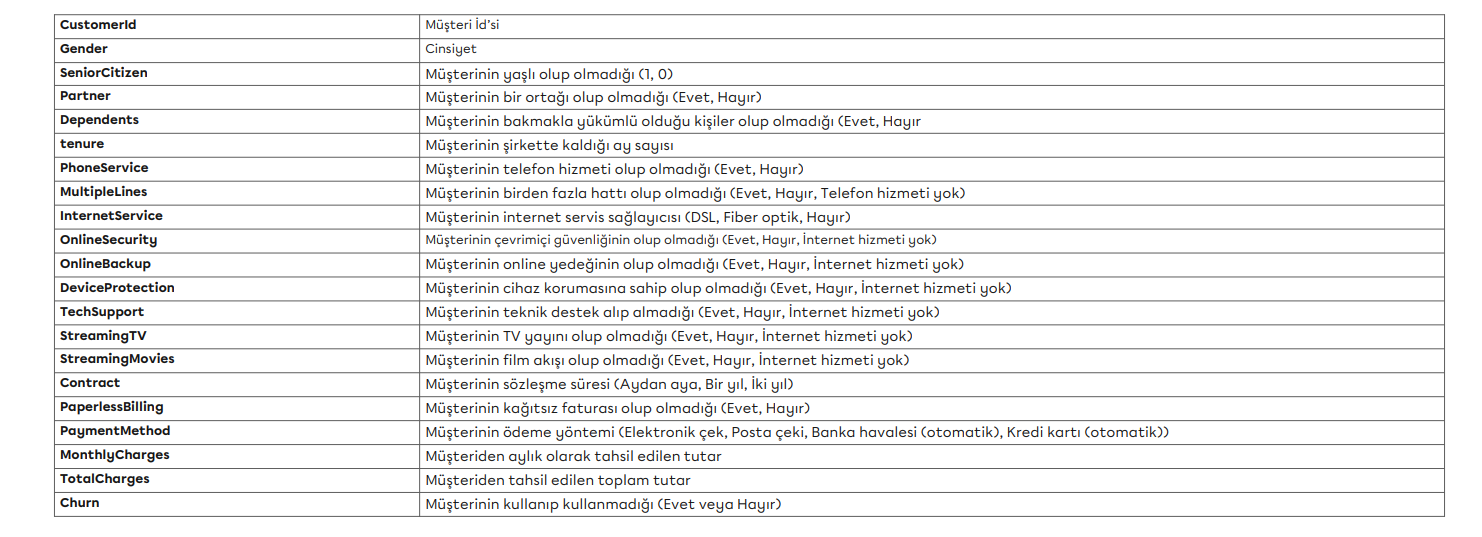

# Packages and reading the dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate, validation_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix ,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report
import itertools
from matplotlib import rc
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import skew
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from skompiler import skompile
import ast
import warnings
warnings.filterwarnings('ignore')

In [2]:
def load_application_train():
    data = pd.read_csv("Telco-Customer-Churn.csv")
    return data

df = load_application_train()
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
df.drop("customerID", axis=1, inplace=True)

In [5]:
def check_dataframe(dataframe, head=5):
    print("##### Shape #####")
    print(dataframe.shape)

    print("\n##### Types #####")
    print(dataframe.dtypes)

    print("\n##### Tail #####")
    print(dataframe.tail(head))

    print("\n##### Head #####")
    print(dataframe.head(head))

    print("\n##### Null Analysis #####")
    print(dataframe.isnull().sum())

    print("\n##### Quantiles #####")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
    
check_dataframe(df)

##### Shape #####
(7043, 20)

##### Types #####
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

##### Tail #####
      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042 

.

We have 7043 rows and 20 columns.

7043 satırımız ve 20 sütunumuz var.

# Missing values analysis

In [6]:
for col in df.columns:
    if df[col].dtype in ['object','category']:
        filtered_values = [value for value in df[col] if pd.notnull(value) and value < '0']
        filtered_values.sort()
        print(col, "=" ,filtered_values)

gender = []
Partner = []
Dependents = []
PhoneService = []
MultipleLines = []
InternetService = []
OnlineSecurity = []
OnlineBackup = []
DeviceProtection = []
TechSupport = []
StreamingTV = []
StreamingMovies = []
Contract = []
PaperlessBilling = []
PaymentMethod = []
TotalCharges = [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
Churn = []


In [7]:
df["TotalCharges"] = df["TotalCharges"].replace(' ', np.nan)
df["TotalCharges"] = df["TotalCharges"].astype(float)
df.dropna(inplace=True)

In [8]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_name:
        return na_columns

missing_values_table(df)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


Eksik değerler incelendi.

Missing values were examined.

**VARİABLES**

In [9]:
def grab_col_names(dataframe, cat_th=10, car_th=20):  
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
        
    return cat_cols, num_cols, cat_but_car

In [10]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 7032
Variables: 20
cat_cols: 17
num_cols: 3
cat_but_car: 0
num_but_cat: 1


17 kategorik ve 3 numerik değişken vardır.

we have seventeen categorical variables and three numeric variables 

# Outliers

In [11]:
def outlier_thresholds(dataframe, col, low_quantile=0.05, up_quantile=0.95):
    
    quantile_one = dataframe[col].quantile(low_quantile)
    quantile_three = dataframe[col].quantile(up_quantile)
    
    interquantile_range = quantile_three - quantile_one
    up_limit = quantile_three + 1.5 * interquantile_range
    low_limit = quantile_one - 1.5 * interquantile_range
    
    return  low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [12]:
for col in num_cols:
    print(col, check_outlier(df, col))

tenure False
MonthlyCharges False
TotalCharges False


no outliers

# EXPLORATORY DATA ANALYSIS

# •   Numeric and Categorical Variables

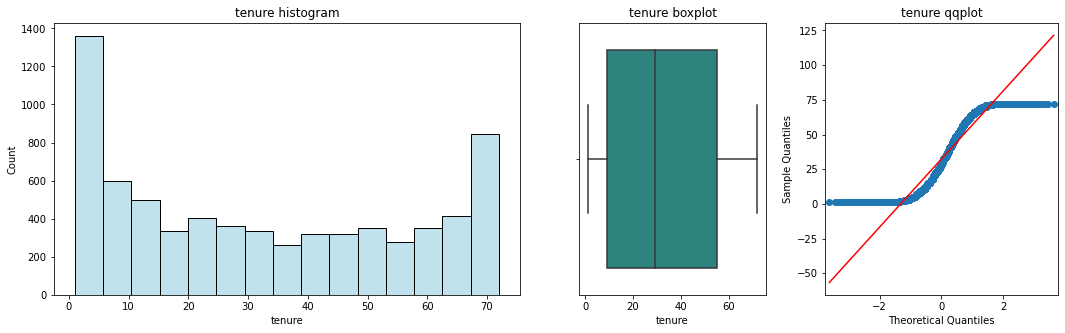

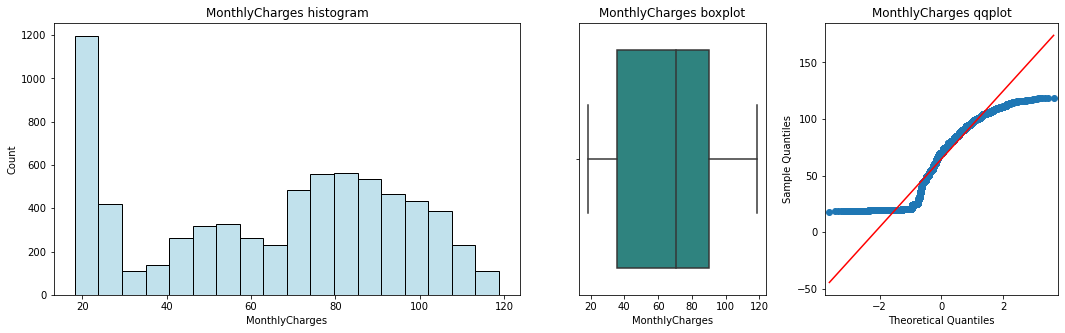

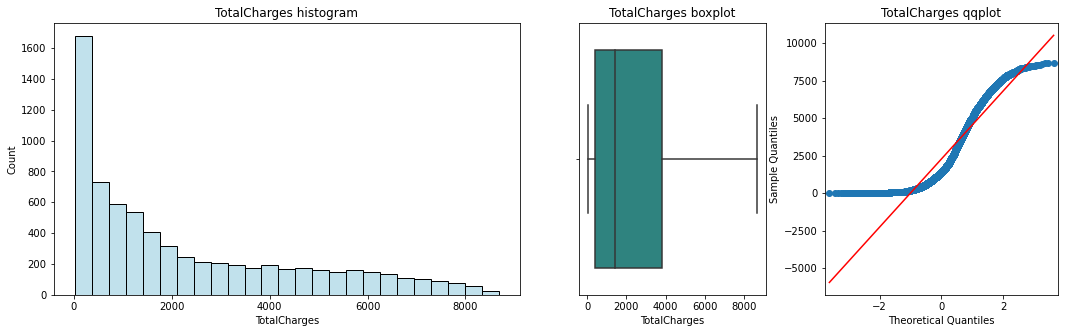

In [13]:
def generate_numerical_viz(data):
    for i in data[num_cols]:
        fig, axes = plt.subplots(1,3,figsize = (18,5),gridspec_kw={'width_ratios': [2, 0.8,1]})
        sns.histplot(data[i],ax=axes[0],color = 'lightblue')
        axes[0].set_title(f"{i} histogram")
        sns.boxplot(data[i],ax=axes[1],palette = "viridis")
        axes[1].set_title(f"{i} boxplot")
        qqplot(data[i],ax = axes[2],line="s")    
        axes[2].set_title(f"{i} qqplot")
        plt.show()
        
generate_numerical_viz(df)

tenure ---> A customer stays with the company for an average of 32.42 months.

MonthlyCharges ---> The average amount charged monthly from a customer is approximately 65.

TotalCharges ----> The average total amount charged from the customer is 2283.3.

<hr style="border: 1px solid black; width: 99%; margin-left: 0;">

tenure   --->  Bir müşteri ortalama 32.42 ay şirkette kalmaktadır.

MonthlyCharges  ---> Bir müşteriden aylık olarak tahsil edilen ortalama tutar yaklaşık olarak 65'tir.

TotalCharges ----> Müşteriden tahsil edilen toplam tutar ortalama 2283.3'tür.



####################################################################################################
Male      3549
Female    3483
Name: gender, dtype: int64
####################################################################################################


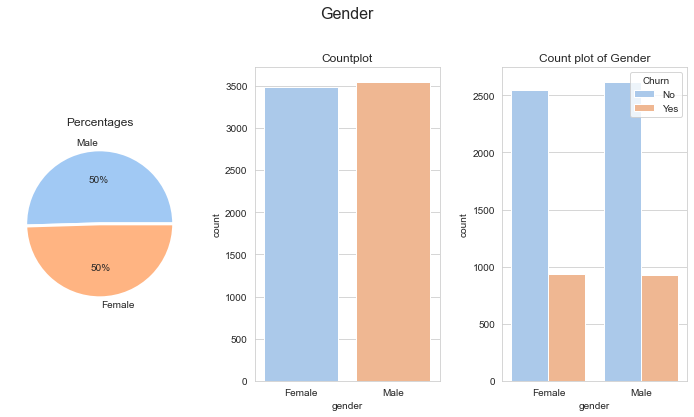

####################################################################################################
No     3639
Yes    3393
Name: Partner, dtype: int64
####################################################################################################


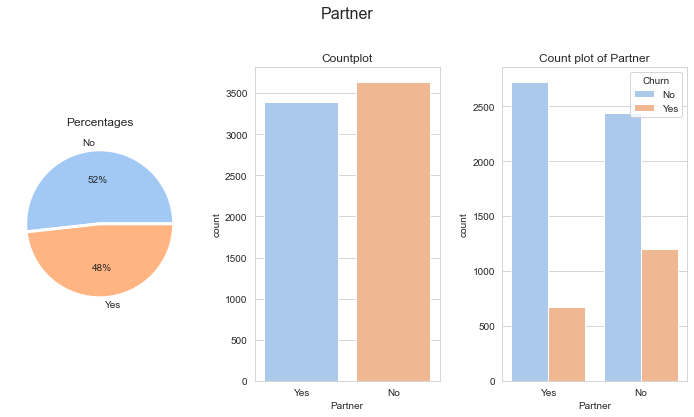

####################################################################################################
No     4933
Yes    2099
Name: Dependents, dtype: int64
####################################################################################################


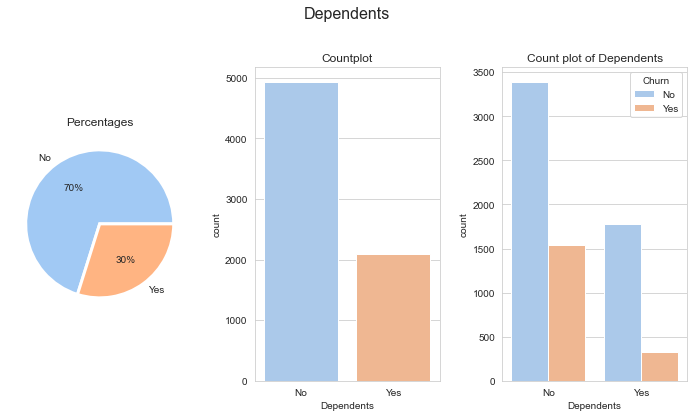

####################################################################################################
Yes    6352
No      680
Name: PhoneService, dtype: int64
####################################################################################################


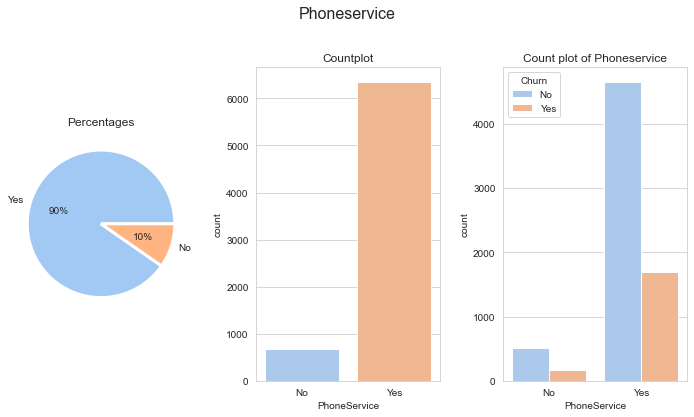

####################################################################################################
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64
####################################################################################################


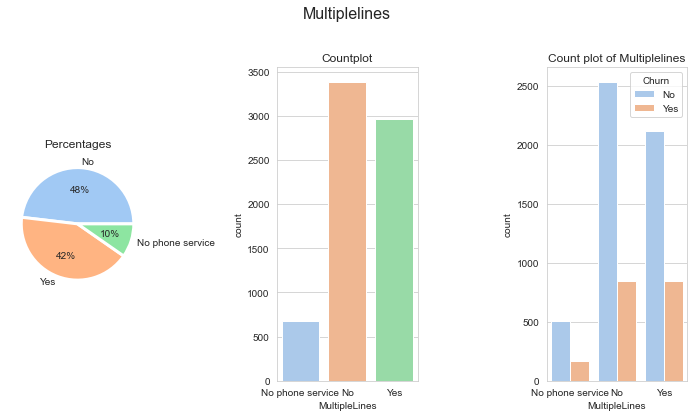

####################################################################################################
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64
####################################################################################################


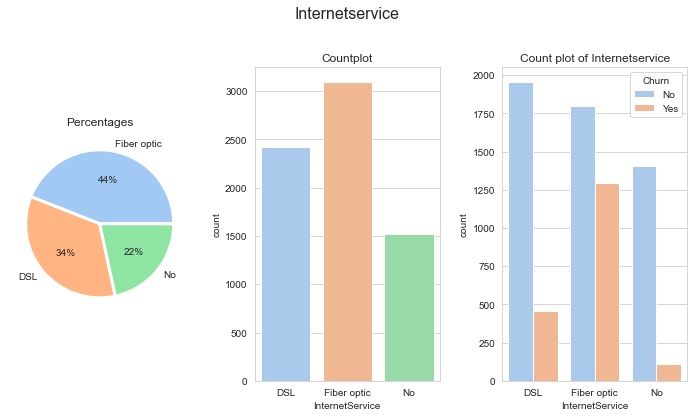

####################################################################################################
No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64
####################################################################################################


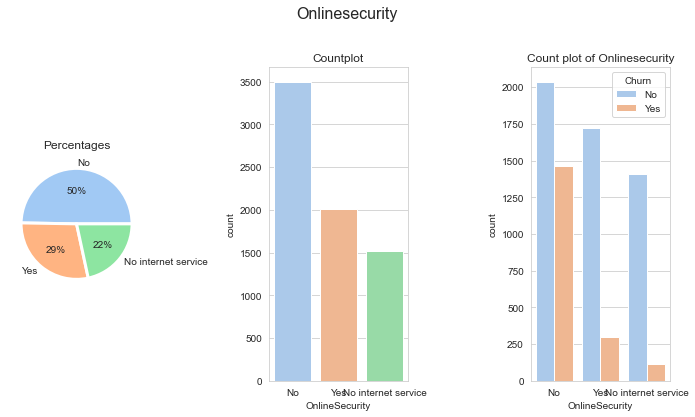

####################################################################################################
No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64
####################################################################################################


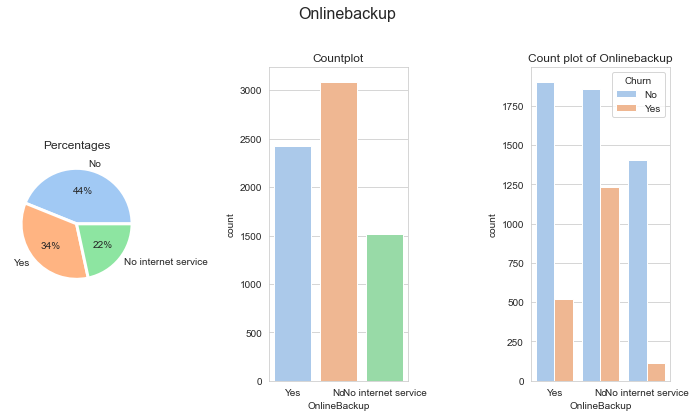

####################################################################################################
No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64
####################################################################################################


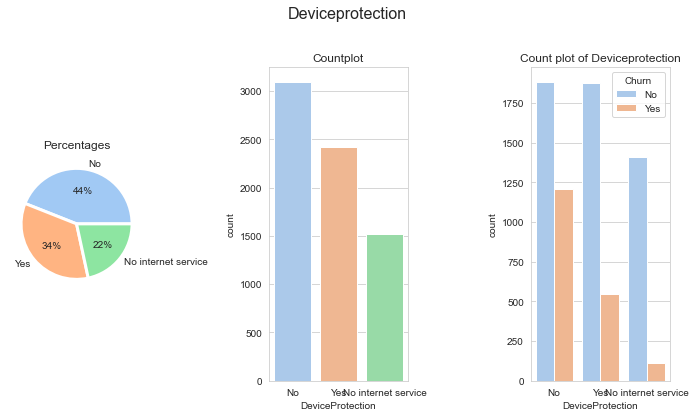

####################################################################################################
No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64
####################################################################################################


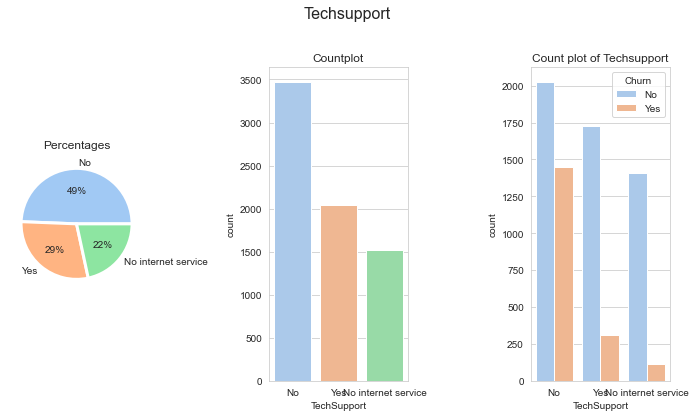

####################################################################################################
No                     2809
Yes                    2703
No internet service    1520
Name: StreamingTV, dtype: int64
####################################################################################################


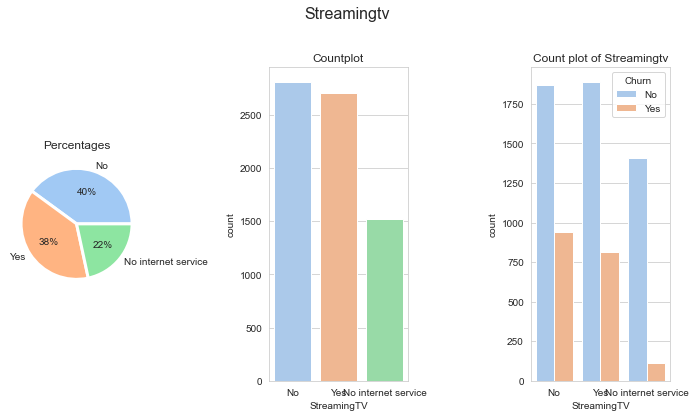

####################################################################################################
No                     2781
Yes                    2731
No internet service    1520
Name: StreamingMovies, dtype: int64
####################################################################################################


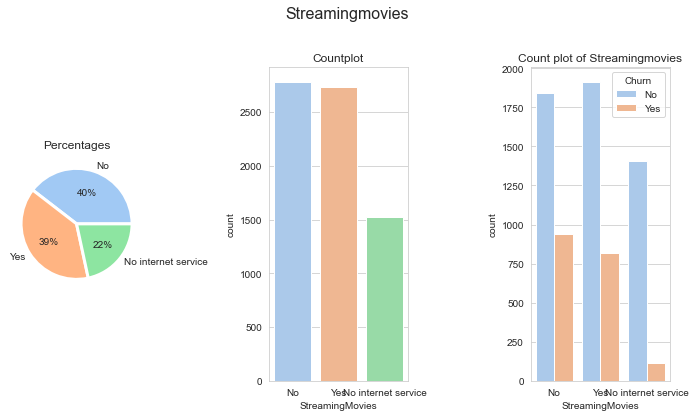

####################################################################################################
Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64
####################################################################################################


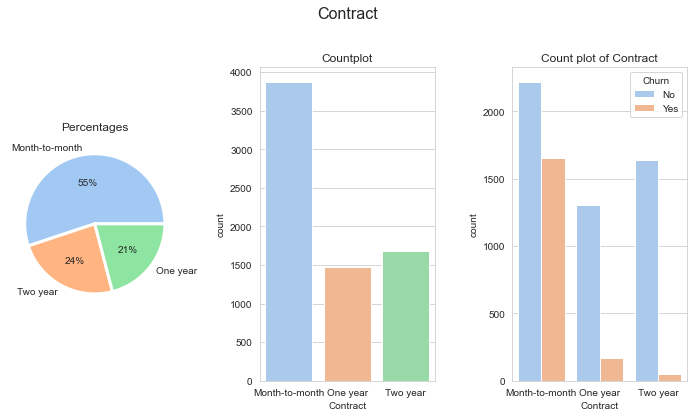

####################################################################################################
Yes    4168
No     2864
Name: PaperlessBilling, dtype: int64
####################################################################################################


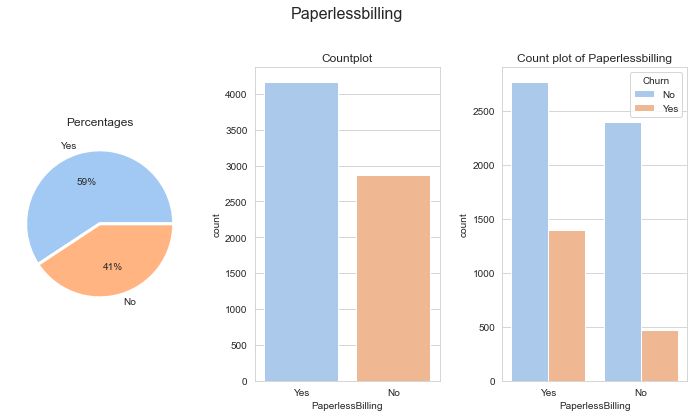

####################################################################################################
Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64
####################################################################################################


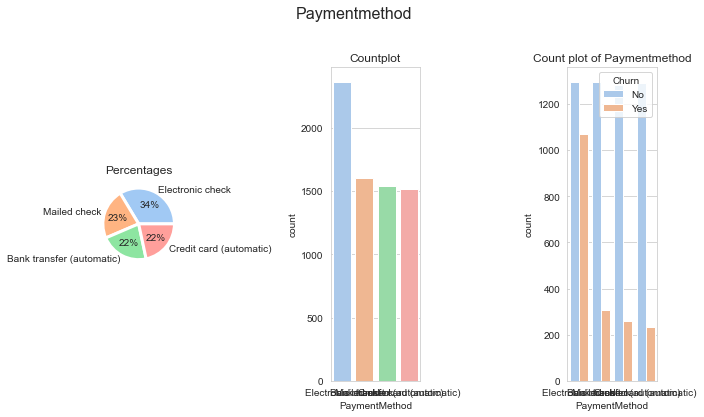

####################################################################################################
No     5163
Yes    1869
Name: Churn, dtype: int64
####################################################################################################


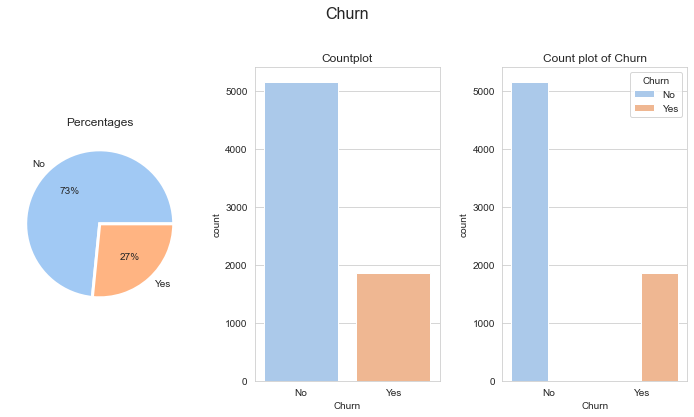

####################################################################################################
0    5890
1    1142
Name: SeniorCitizen, dtype: int64
####################################################################################################


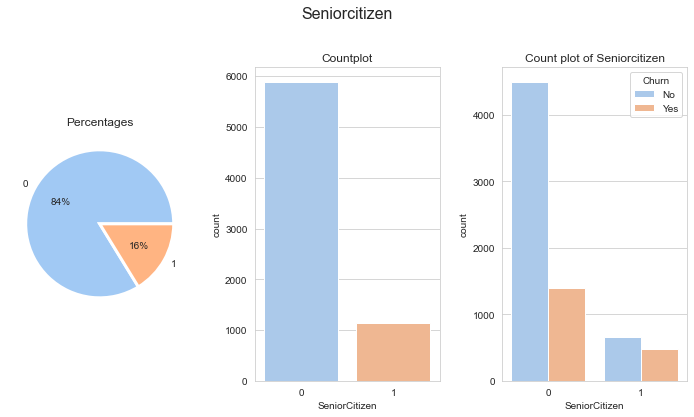

In [14]:
def cat_plots(dataframe, cat_col, target, colors=None):
    print("".center(100, "#"))
    print(dataframe[cat_col].value_counts())
    print("".center(100, "#"))

    if colors is None:
        colors = sns.color_palette("pastel")  

    plt.figure(figsize=(10, 6)) 
    sns.set_style("whitegrid")
    plt.suptitle(cat_col.capitalize(), size=16)

    plt.subplot(1, 3, 1)
    plt.title("Percentages")
    plt.pie(dataframe[cat_col].value_counts().values.tolist(),
            labels=dataframe[cat_col].value_counts().keys().tolist(),
            labeldistance=1.1,
            wedgeprops={'linewidth': 3, 'edgecolor': 'white'},
            colors=colors,
            autopct='%1.0f%%')

    plt.subplot(1, 3, 2)
    plt.title("Countplot")
    sns.countplot(data=dataframe, x=cat_col, palette=colors)
    plt.tight_layout(pad=2)  

    plt.subplot(1, 3, 3)
    sns.countplot(data=dataframe, x=cat_col, hue=target, palette=colors)
    plt.title(f"Count plot of {cat_col.capitalize()}")
    plt.tight_layout(pad=2)  
    plt.show(block=True)

    
for col in cat_cols:
    cat_plots(df, col, "Churn")

Half of the customers are women and half are men.

While 52% of customers have a partner, 48% do not.

While 70% of customers have no dependents, 30% have dependents.

While 90% of customers have telephone service, 10% do not.

48% of customers do not have more than one line, 42% do and 10% do not have phone service.

44% of customers have Fiber Optic internet service providers, 34% DSL and 22% do not have internet service providers.

50% of customers do not have online security, 29% have and 22% do not have internet service.

44% of customers do not have an online backup, 34% do, and 22% do not have an internet service provider.

44% of customers do not have device protection, 34% do, and 22% do not have an internet service provider.

49% of customers do not receive technical support, 29% do and
22% do not have an internet service provider.

40% of customers do not stream tv, 38% do and 22% do not have an internet service provider.

40% of customers do not stream movies, 39% do, and 22% do not have an internet service provider.

55% of customers have a monthly contract, 24% biennially and 21% annually.

While 59% of customers have a paperless invoice, 41 do not.

Payment methods of 34% of customers are electronic check, 23% by e-mail check, 22% by bank transfer and 22% by credit card.

Churn 73% no and 27% yes.

SeniorCitizen 84% 0 and 16% 1.

<hr style="border: 1px solid black; width: 99%; margin-left: 0;">

Müşterilerin yarısı kadın yarısı erkektir.

Müşterilerin %52'sinin partneri varken %48'inin yoktur.

Müşterilerin %70'inin bakmakla yükümlü olduğu kimse yokken %30'unun bakmakla yükümlü olduğu kişiler vardır.

Müşterilerin %90'ında telefon hizmeti varken %10'luk kısımda telefon hizmeti yoktur.

Müşterilerin %48'inin birden fazla hattı yoktur , %42'sinin vardır ve %10'unun telefon hizmeti yoktur.

Müşterilerin %44'ünün internet servis sağlayıcısı Fiber Optiktir, %34 DSL ve %22'sinin internet servis sağlayıcısı yoktur.

Müşterilerin %50'sinin çevrimiçi güvenliği yoktur , %29'unun vardır ve %22'inin internet servisi yoktur.

Müşterilerin %44'ünün online yedeği yoktur, %34'ünün vardır ve %22'sinin internet servis sağlayıcısı yoktur.

Müşterilerin %44'ü cihaz korumasına sahip değildir, %34'ü sahiptir ve %22'sinin internet servis sağlayıcısı yoktur.

Müşterilerin %49'u teknik destek almamaktadır, %29'u almaktadır ve 
%22'sinin internet servis sağlayıcısı yoktur.

Müşterilerin %40'ının tv akışı yoktur , %38'inin vardır ve %22'sinin internet servis sağlayıcısı yoktur.

Müşterilerin %40'ının film akışı yoktur , %39'unun vardır ve %22'sinin internet servis sağlayıcısı yoktur.

Müşterilerin %55'inin sözleşme süresi aydan aya , %24'ü iki yılda bir ve %21'i yılda birdir.

Müşterilerin %59'unun kağıtsız faturası varken 41'inin yoktur.

Müşterilerin %34'ünün ödeme yöntemi Elektronik çek, %23'ünün mail çek , %22'si banka havalesi ve %22'si kredi kartıdır.

Churn %73 no ve %27 yes.

SeniorCitizen %84 0 ve %16 1.



# •  Target Analysıs

In [15]:
df["Churn"] = df["Churn"].apply(lambda x : 1 if x == "Yes" else 0)

In [16]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")


for col in num_cols:
    target_summary_with_num(df, "Churn", col)

       tenure
Churn        
0      37.650
1      17.979


       MonthlyCharges
Churn                
0              61.307
1              74.441


       TotalCharges
Churn              
0          2555.344
1          1531.796




As the number of months the customer stays in the company decreases, the probability of the customer leaving increases.

As the monthly amount collected from the customer increases, the probability of the customer leaving increases.

The average total amount collected from the customer is higher for those who do not leave and lower for those who leave.
Since those in the 0 group are customers for a longer period of time, the total average amount may be higher.

<hr style="border: 1px solid black; width: 99%; margin-left: 0;">


Müşterinin şirkette kaldığı ay sayısı azaldıkça müşterinin ayrılma olasılığı da artmaktadır.

Müşteriden aylık olarak tahsil edilen tutar arttıkça müşterinin ayrılma olasılığı da artmaktadır.

Müşteriden tahsil edilen toplam tutar ortalaması ayrılmayanlarda daha fazlayken ayrılanlarda daha azdır.
0 grubundakiler daha fazla süre müşteri olduğundan toplam ortalama tutar daha fazla olabilir.




In [17]:
def targetSummaryWithCat(dataframe, target, categorical_col):
    print(categorical_col)
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean(),
                        "Count": dataframe[categorical_col].value_counts(),
                        "Ratio": 100 * dataframe[categorical_col].value_counts() / len(dataframe)}), end="\n\n\n")


for col in cat_cols:
    targetSummaryWithCat(df, "Churn", col)

gender
        TARGET_MEAN  Count  Ratio
Female        0.270   3483 49.531
Male          0.262   3549 50.469


Partner
     TARGET_MEAN  Count  Ratio
No         0.330   3639 51.749
Yes        0.197   3393 48.251


Dependents
     TARGET_MEAN  Count  Ratio
No         0.313   4933 70.151
Yes        0.155   2099 29.849


PhoneService
     TARGET_MEAN  Count  Ratio
No         0.250    680  9.670
Yes        0.267   6352 90.330


MultipleLines
                  TARGET_MEAN  Count  Ratio
No                      0.251   3385 48.137
No phone service        0.250    680  9.670
Yes                     0.286   2967 42.193


InternetService
             TARGET_MEAN  Count  Ratio
DSL                0.190   2416 34.357
Fiber optic        0.419   3096 44.027
No                 0.074   1520 21.615


OnlineSecurity
                     TARGET_MEAN  Count  Ratio
No                         0.418   3497 49.730
No internet service        0.074   1520 21.615
Yes                        0.146   2015 28.655


O

When the customer has a partner, the customer is less likely to leave than when the customer does not have a partner.

Fibre optic internet service may be an important factor for the customer to leave.

The fact that the customer does not receive technical support may be an important factor in the customer's departure.

If the customer's contract period is month-to-month, it may be an important factor in the customer's departure.

The fact that the customer's payment method is not automatic may be an important factor in the customer's departure.

<hr style="border: 1px solid black; width: 99%; margin-left: 0;">


Müşterinin bir ortağı olduğunda ayrılma durumu ortağı olmadığındaki ayrılma durumuna göre daha azdır.

Internet servisinin Fiber optic olması müşterinin ayrılmasında önemli bir etken olabilir.

Müşterinin teknik destek almaması müşterinin ayrılmasında önemli bir etken olabilir.

Müşterinin sözleşme süresi Aydan aya olması müşterinin ayrılmasında önemli bir etken olabilir.

Müşterinin ödeme yönteminin automatic olmaması müşterinin ayrılmasında önemli bir etken olabilir.

# • Correlation

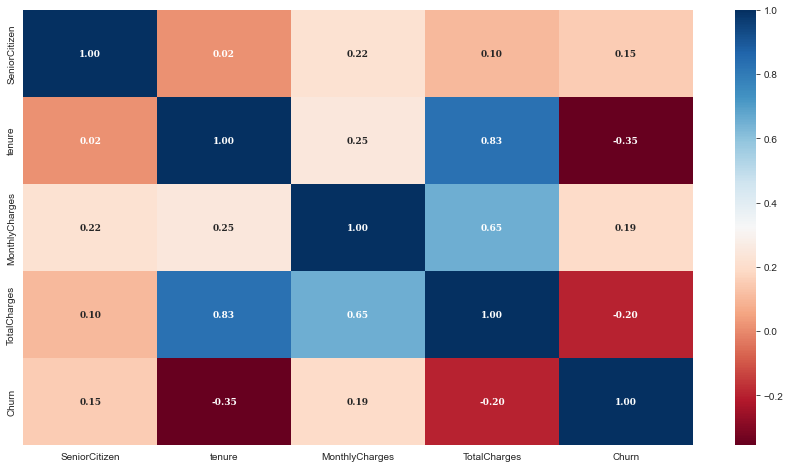

In [18]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(method= 'pearson'),annot=True,fmt=".2f",
                cmap="RdBu",
                annot_kws={
                       "fontsize":9,
                       "fontweight":"bold",
                       "fontfamily":"serif"});

# Feature Extraction

In [19]:
num_segments = 3
labels = [3, 2, 1]
df['segment_tenure'] = pd.qcut(df['tenure'], q=num_segments, labels=labels)
df['segment_tenure'] = df['segment_tenure'].astype(float)

In [20]:
def total_service(row):
    
    if (row["PhoneService"] == "Yes" and row["OnlineSecurity"] == "Yes" and row["OnlineBackup"] == "Yes" and
       (row["InternetService"]=="DSL" or row["InternetService"]=="Fiber optic")):
        return 4
    
    elif ((row["PhoneService"] == "Yes" and row["OnlineSecurity"] == "Yes" and row["OnlineBackup"] == "Yes" and
          row["InternetService"]=="No") or
          
          (row["PhoneService"] == "Yes" and row["OnlineSecurity"] == "Yes" and row["OnlineBackup"] == "No" and
          (row["InternetService"]=="DSL" or row["InternetService"]=="Fiber optic")) or
          
          (row["PhoneService"] == "Yes" and row["OnlineSecurity"] == "No" and row["OnlineBackup"] == "Yes" and
          (row["InternetService"]=="DSL" or row["InternetService"]=="Fiber optic")) or 
          
          (row["PhoneService"] == "No" and row["OnlineSecurity"] == "Yes" and row["OnlineBackup"] == "Yes" and
          (row["InternetService"]=="DSL" or row["InternetService"]=="Fiber optic"))):
        return 3
    
    elif ((row["PhoneService"] == "Yes" and row["OnlineSecurity"] == "Yes" and row["OnlineBackup"] == "No" and
          row["InternetService"]=="No") or
          
          (row["PhoneService"] == "Yes" and row["OnlineSecurity"] == "No" and row["OnlineBackup"] == "Yes" and
           row["InternetService"]=="No") or
          
          (row["PhoneService"] == "No" and row["OnlineSecurity"] == "Yes" and row["OnlineBackup"] == "Yes" and
           row["InternetService"]=="No") or 
          
          (row["PhoneService"] == "No" and row["OnlineSecurity"] == "No" and row["OnlineBackup"] == "Yes" and
          (row["InternetService"]=="DSL" or row["InternetService"]=="Fiber optic")) or
          
          (row["PhoneService"] == "No" and row["OnlineSecurity"] == "Yes" and row["OnlineBackup"] == "No" and
          (row["InternetService"]=="DSL" or row["InternetService"]=="Fiber optic")) or
         
          (row["PhoneService"] == "Yes" and row["OnlineSecurity"] == "No" and row["OnlineBackup"] == "No" and
          (row["InternetService"]=="DSL" or row["InternetService"]=="Fiber optic"))):
        return 2
    
    elif ((row["PhoneService"] == "Yes" and row["OnlineSecurity"] == "No" and row["OnlineBackup"] == "No" and
          row["InternetService"]=="No") or
          
          (row["PhoneService"] == "No" and row["OnlineSecurity"] == "Yes" and row["OnlineBackup"] == "No" and
          row["InternetService"]=="No") or
          
          (row["PhoneService"] == "No" and row["OnlineSecurity"] == "No" and row["OnlineBackup"] == "Yes" and
          row["InternetService"]=="No") or 
          
          (row["PhoneService"] == "No" and row["OnlineSecurity"] == "No" and row["OnlineBackup"] == "No" and
          (row["InternetService"]=="DSL" or row["InternetService"]=="Fiber optic"))):
        return 1
    else:
        return 0

    
df["Total_Services"] = df.apply(total_service, axis=1)

In [21]:
def total_streaming(row):
    if row["StreamingTV"]=="Yes" and row["StreamingMovies"]=="Yes":
        return 2
    elif ((row["StreamingTV"]=="Yes" and row["StreamingMovies"]=="No") or 
         (row["StreamingTV"]=="No" and row["StreamingMovies"]=="Yes")):
        return 1
    else:
        return 0
    
df["Total_Streaming"] = df.apply(total_streaming, axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,segment_tenure,Total_Services,Total_Streaming
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,0,3.000,2,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,0,2.000,3,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,1,3.000,4,0
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.750,0,2.000,2,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.650,1,3.000,2,0


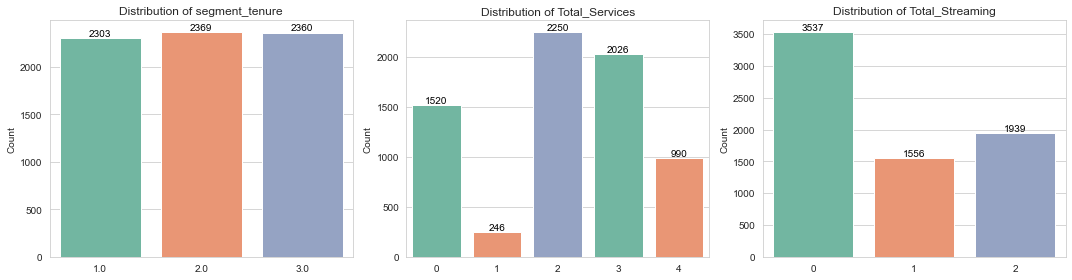

In [22]:
def visualize_features(dataframe):
    feature_columns = ['segment_tenure', 'Total_Services', 'Total_Streaming']
    num_plots = len(feature_columns)
    
    plt.figure(figsize=(15, 4))
    
    custom_palette = ["#66c2a5", "#fc8d62", "#8da0cb"]
    
    for i, feature in enumerate(feature_columns, 1):
        plt.subplot(1, num_plots, i)
        ax = sns.countplot(x=feature, data=dataframe, palette=custom_palette)
        plt.xlabel('')
        plt.ylabel('Count')
        plt.title(f'Distribution of {feature}')
        
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), 
                        ha='center', va='bottom', fontsize=10, color='black')
    
    plt.tight_layout()
    plt.show()

visualize_features(df)

# Encoding

In [23]:
class CFG:
    outlier_clipper = False
    outlier_remover = False
    outlier_replacer = False
    
    one_hot_encoder = False
    label_encoder = True
    ordinal_encoder = True
    
    min_max_scaler = False
    robust_scaler = True
    standard_scaler = False

In [24]:
class DataProcessorEncode:
    def __init__(self, cfg):
        self.cfg = cfg

    def encode_data(self, dataframe):
        if self.cfg.one_hot_encoder:
            object_cols = [col for col in dataframe.columns if dataframe[col].dtype in ["object","category"]
                           and dataframe[col].nunique()>2]
            if len(object_cols) > 0:
                dataframe = pd.get_dummies(dataframe, columns=object_cols)
                print("One-hot encoding applied.")
            else:
                print("Warning: No object or category columns found. One-hot encoding was not applied.")

        if self.cfg.label_encoder:
            label_encoder = LabelEncoder()
            object_cols = [col for col in dataframe.columns if dataframe[col].dtype in ["object","category"]
                           and dataframe[col].nunique()==2]
            if len(object_cols) > 0:
                for col in object_cols:
                    dataframe[col] = label_encoder.fit_transform(dataframe[col])
                print("Label encoding applied.")
            else:
                print("Warning: No object or category columns found. Label encoding was not applied.")
                
        if self.cfg.ordinal_encoder:
            ordinal_encoder = {}
            object_cols = dataframe.select_dtypes(include=['object', 'category']).columns
            if len(object_cols) > 0:
                for col in object_cols:
                    unique_values = sorted(dataframe[col].unique())
                    ordinal_encoder[col] = {value: index for index, value in enumerate(unique_values)}
                    dataframe[col] = dataframe[col].map(ordinal_encoder[col])
                print("Ordinal encoding applied.")
            else:
                print("Warning: No object or category columns found. Ordinal encoding was not applied.")


        return dataframe

data_processor_encode = DataProcessorEncode(CFG())
df = data_processor_encode.encode_data(df)
df.head()

Label encoding applied.
Ordinal encoding applied.


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,segment_tenure,Total_Services,Total_Streaming
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.850,29.850,0,3.000,2,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.950,1889.500,0,2.000,3,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.850,108.150,1,3.000,4,0
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.300,1840.750,0,2.000,2,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.700,151.650,1,3.000,2,0


# Scaling

In [25]:
class DataProcessorScaled:
    def __init__(self, cfg):
        self.cfg = cfg

    def scaled_data(self, dataframe):
        if self.cfg.min_max_scaler:
            num_cols = dataframe.select_dtypes(include=['int', 'float']).columns
            if len(num_cols) > 0:
                min_max_scaler = MinMaxScaler()
                dataframe[num_cols] = min_max_scaler.fit_transform(dataframe[num_cols])
                print("Min-Max scaling applied.")
            else:
                print("Warning: No numerical columns found. Min-Max scaling was not applied.")

        if self.cfg.standard_scaler:
            num_cols = dataframe.select_dtypes(include=['int', 'float']).columns
            if len(num_cols) > 0:
                standard_scaler = StandardScaler()
                dataframe[num_cols] = standard_scaler.fit_transform(dataframe[num_cols])
                print("Standard scaling applied.")
            else:
                print("Warning: No numerical columns found. Standard scaling was not applied.")

        if self.cfg.robust_scaler:
            num_cols = dataframe.select_dtypes(include=['int', 'float']).columns
            if len(num_cols) > 0:
                robust_scaler = RobustScaler()
                dataframe[num_cols] = robust_scaler.fit_transform(dataframe[num_cols])
                print("Robust scaling applied.")
            else:
                print("Warning: No numerical columns found. Robust scaling was not applied.")

        return dataframe
    
data_processor_scale = DataProcessorScaled(CFG())
df = data_processor_scale.scaled_data(df)
df.head()

Robust scaling applied.


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,segment_tenure,Total_Services,Total_Streaming
0,-1.000,0.000,1.000,0.000,-0.609,-1.000,0.000,-1.000,-0.500,0.500,-0.500,-0.500,-0.500,-0.500,0.000,0.000,0.000,-0.746,-0.403,0.000,0.500,0.000,0.000
1,0.000,0.000,0.000,0.000,0.109,0.000,-0.500,-1.000,0.500,-0.500,0.500,-0.500,-0.500,-0.500,1.000,-1.000,1.000,-0.247,0.145,0.000,0.000,0.500,0.000
2,0.000,0.000,0.000,0.000,-0.587,0.000,-0.500,-1.000,0.500,0.500,-0.500,-0.500,-0.500,-0.500,0.000,0.000,1.000,-0.304,-0.380,1.000,0.500,1.000,0.000
3,0.000,0.000,0.000,0.000,0.348,-1.000,0.000,-1.000,0.500,-0.500,0.500,0.500,-0.500,-0.500,1.000,-1.000,-2.000,-0.517,0.131,0.000,0.000,0.000,0.000
4,-1.000,0.000,0.000,0.000,-0.587,0.000,-0.500,0.000,-0.500,-0.500,-0.500,-0.500,-0.500,-0.500,0.000,0.000,0.000,0.006,-0.367,1.000,0.500,0.000,0.000


# BASE MODEL

**K-Fold Cross Validation**

Cross-validation is an evaluation method used in machine learning and statistical modeling processes. This approach divides the dataset into training and testing subsets, aiming to assess the overall performance of the model more effectively. In popular techniques like K-fold cross-validation, the dataset is divided into k parts, with each part taking turns as the test data while the other k-1 parts are used as training data. This process is repeated k times, and the results are averaged to obtain a general performance evaluation.

<hr style="border: 1px solid black; width: 99%; margin-left: 0;">

Çapraz doğrulama (cross validation), makine öğrenimi ve istatistiksel modelleme süreçlerinde kullanılan bir değerlendirme yöntemidir. Bu yöntem, veri setini eğitim ve test alt kümelerine böler ve modelin genel performansını daha iyi bir şekilde değerlendirmeyi amaçlar. K-fold çapraz doğrulama gibi popüler tekniklerde, veri seti k parçaya ayrılır ve her bir parça sırayla test verisi olarak kullanılırken diğer k-1 parça eğitim verisi olarak kullanılır. Bu işlem k kez tekrarlanır ve sonuçlar ortalamalar alınarak genel performans değerlendirmesi elde edilir. 

**Hold-out**

The hold-out method is an evaluation technique used in machine learning and statistical modeling processes. In this method, the dataset is divided into two main parts: the training and the test data. This division is often done using a specific ratio (e.g., 80% training, 20% test). The training data is used during the model's learning phase, while the test data is employed to evaluate the performance of the trained model. The hold-out method provides a straightforward evaluation and is commonly used with large datasets. However, since it relies on randomly splitting the data, it can be sensitive to the choice of the data split and the results may vary accordingly.

<hr style="border: 1px solid black; width: 99%; margin-left: 0;">

Hold-out yöntemi, makine öğrenimi ve istatistiksel modelleme süreçlerinde kullanılan bir değerlendirme yöntemidir. Bu yöntemde, veri kümesi iki ana bölüme ayrılır: eğitim ve test verisi. Genellikle belirli bir oran (örneğin %80 eğitim, %20 test) kullanılarak bu bölümleme yapılır. Eğitim verisi, modelin öğrenme aşamasında kullanılırken, test verisi ise eğitilen modelin performansının değerlendirilmesi için kullanılır. Hold-out yöntemi basit bir değerlendirme sağlar ve genellikle büyük veri setleriyle kullanılır. Ancak bu yöntem, verinin rastgele bölünmesine dayandığı için belirli bir veri bölmesine duyarlı olabilir ve sonuçlar bu bölmenin seçimine göre değişebilir.

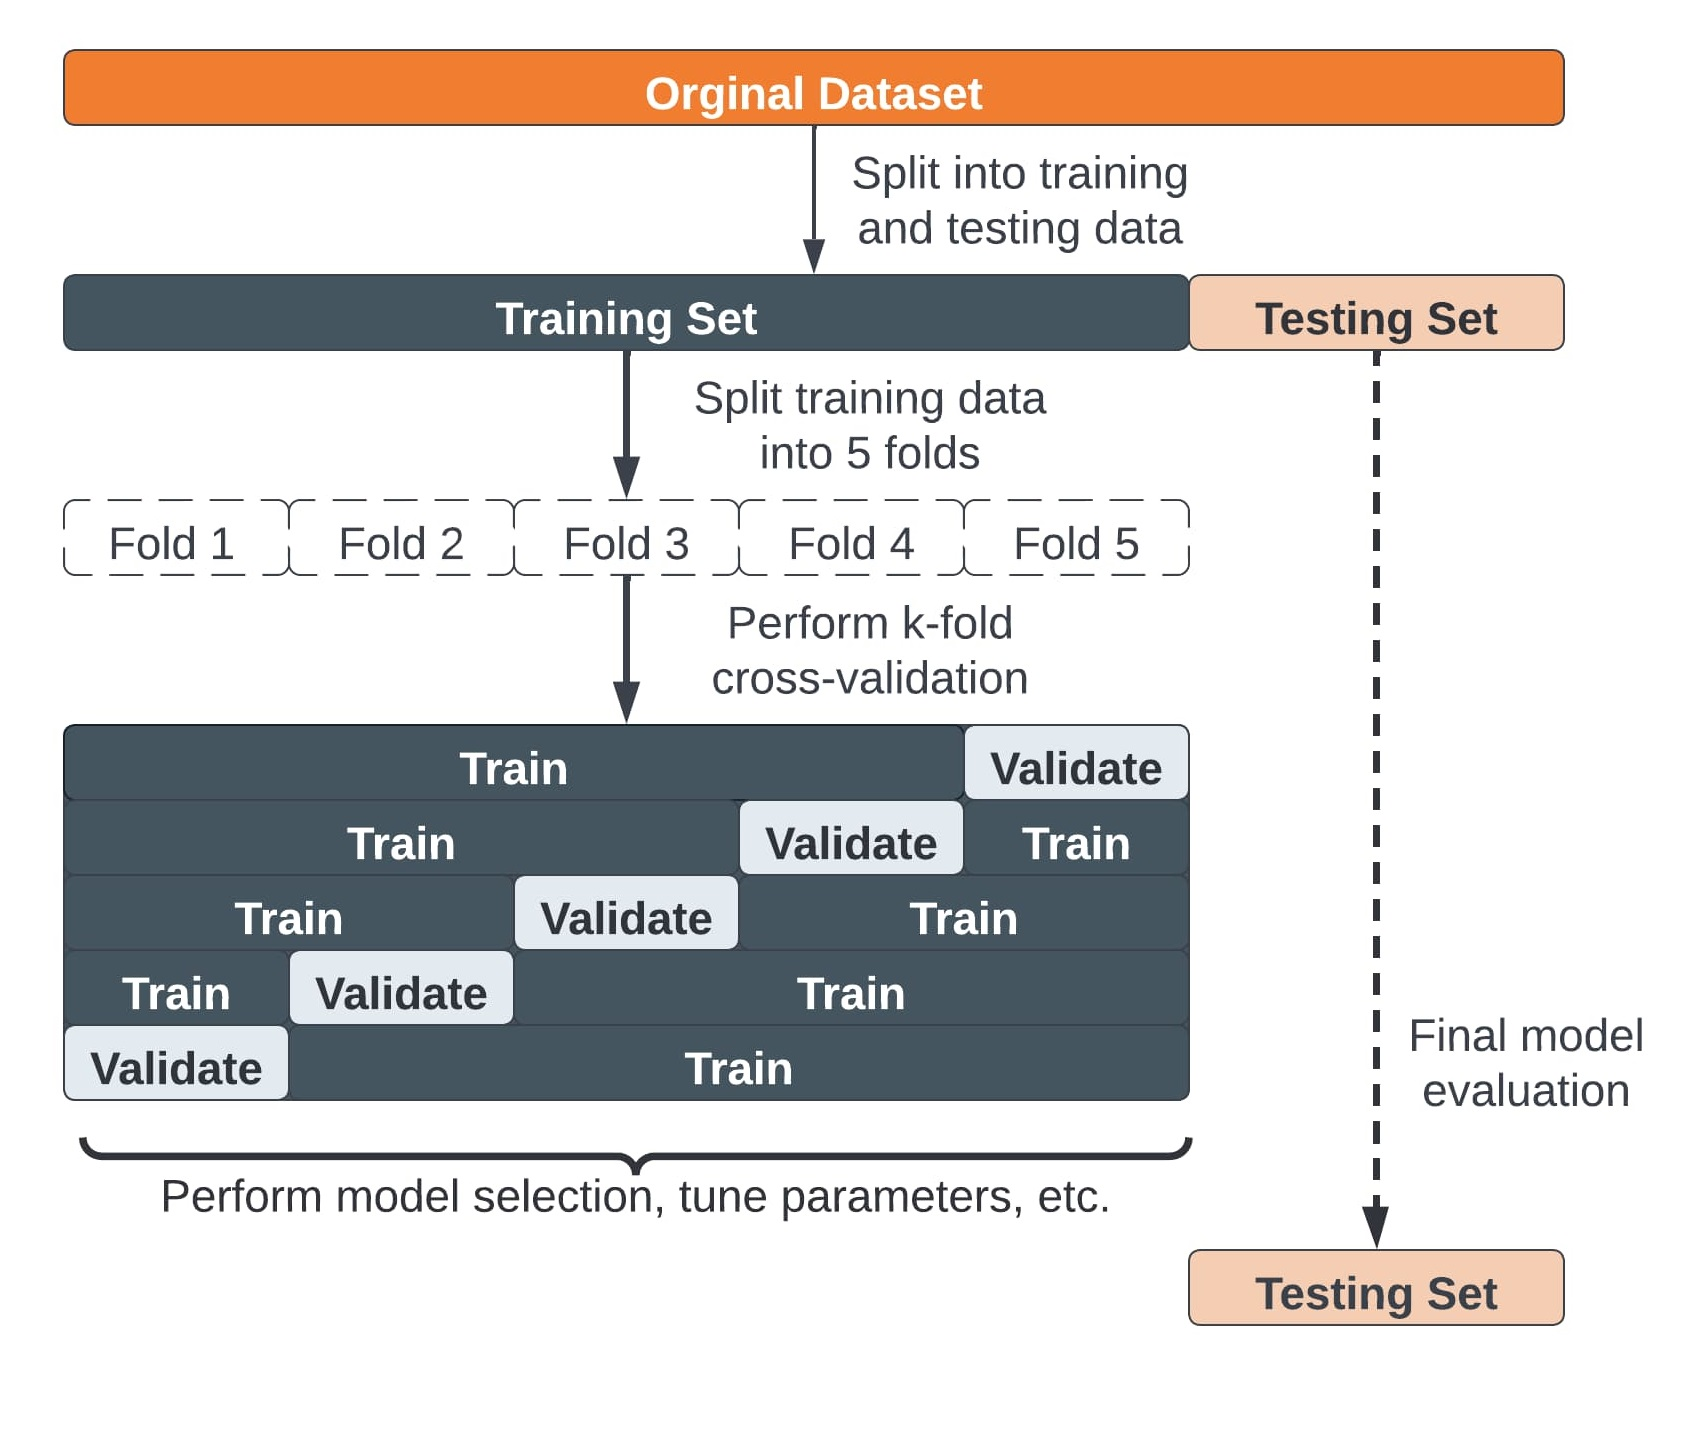

**SMOTE (Synthetic Minority Over-sampling Technique)**

SMOTE (Synthetic Minority Over-sampling Technique) is a machine learning method used to address the problem of class imbalance. Class imbalance is when one class contains significantly fewer samples than another, especially in situations with limited data. This can cause learning algorithms to predominantly learn the majority class and ignore the minority class. To solve this problem, SMOTE aims to balance the minority class by creating synthetic examples. SMOTE takes existing minority class instances, replicates them by generating synthetic instances among their randomly selected neighbours. This can help reduce the risk of overfitting while increasing the representation of the minority class.

<hr style="border: 1px solid black; width: 99%; margin-left: 0;">

SMOTE (Synthetic Minority Over-sampling Technique), sınıf dengesizliği sorununu ele almak için kullanılan bir makine öğrenimi yöntemidir. Özellikle sınırlı veri içeren durumlarda, bir sınıfın diğerine göre belirgin bir şekilde daha az örnek içermesi sınıf dengesizliği olarak adlandırılır. Bu durum, öğrenme algoritmalarının çoğunluk sınıfını ağırlıklı olarak öğrenmesine ve azınlık sınıfını göz ardı etmesine neden olabilir. SMOTE, bu sorunu çözmek için sentetik örnekler oluşturarak azınlık sınıfını dengelemeyi amaçlar. SMOTE, mevcut azınlık sınıfı örneklerini alır, bunları rastgele seçilen komşularının arasında sentetik örnekler üreterek çoğaltır. Bu, azınlık sınıfının temsilini artırırken aşırı uyma riskini azaltmaya yardımcı olabilir.

In [26]:
X = df.drop(columns=['Churn'])
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [27]:
y_train.value_counts()

1.000    4130
0.000    4130
Name: Churn, dtype: int64

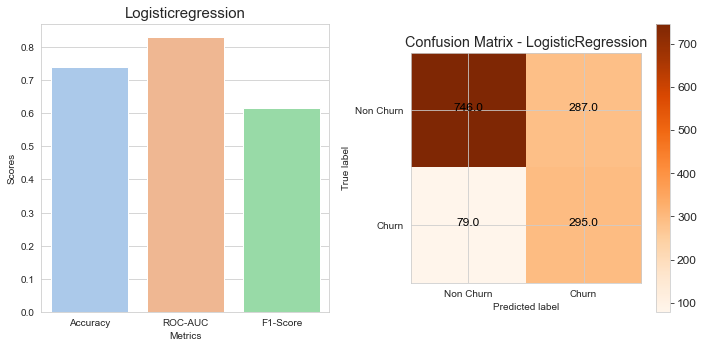

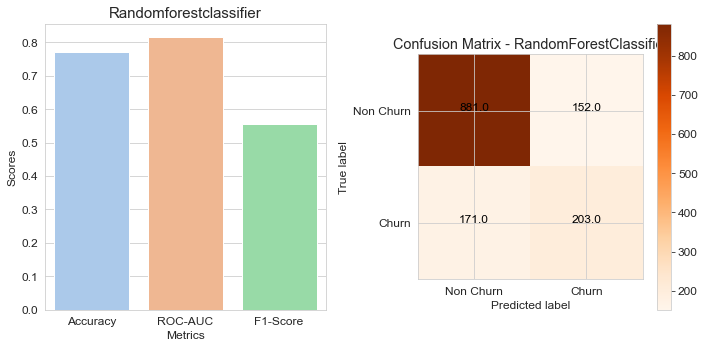

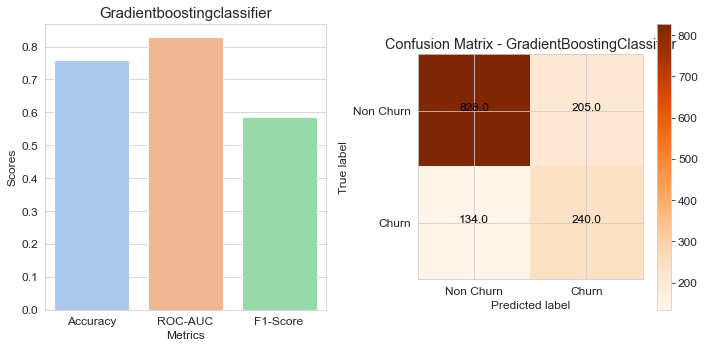

[LightGBM] [Info] Number of positive: 4130, number of negative: 4130
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001167 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3480
[LightGBM] [Info] Number of data points in the train set: 8260, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


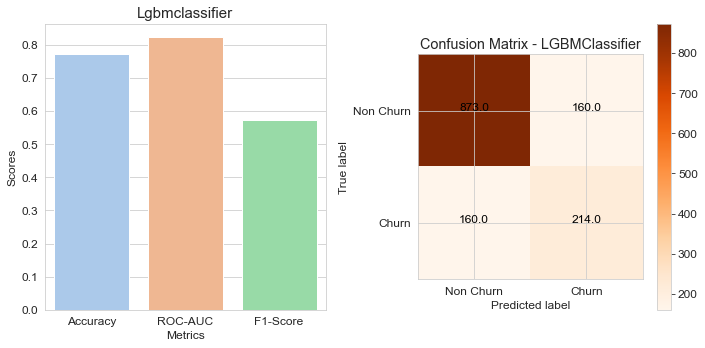

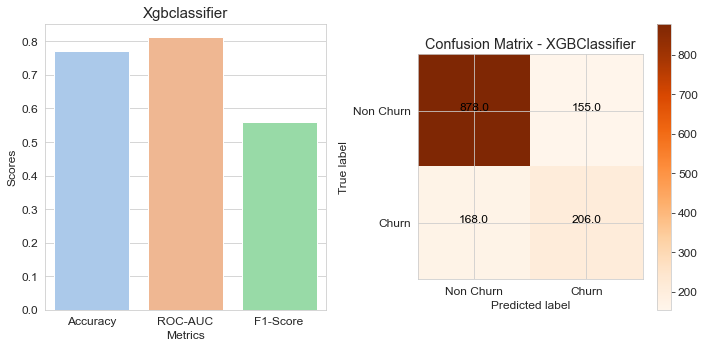

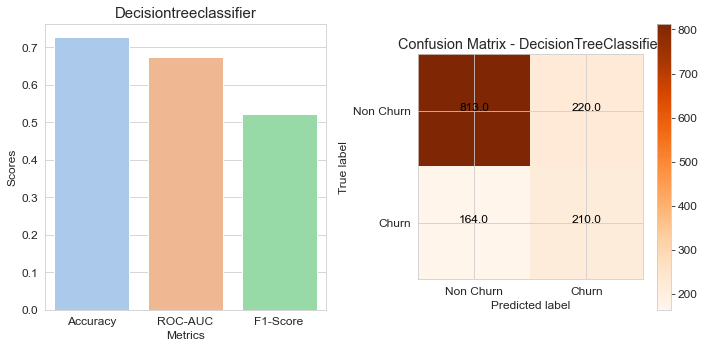

In [28]:
metric_colors = sns.color_palette("pastel")
def base_models(model):
    y_pred = model.fit(X_train, y_train).predict(X_test)
    Accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    f1 = f1_score(y_test, y_pred)
    mt_dataframe = pd.DataFrame({'Scores': [Accuracy, roc_auc, f1],
                                 'Metrics': ['Accuracy', 'ROC-AUC', 'F1-Score']})
    
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title(str(model).split("(")[0].capitalize(), size=15)
    sns.barplot(data=mt_dataframe, x="Metrics", y="Scores", palette=metric_colors)  
    
    plt.subplot(1, 2, 2)
    plt.rcParams.update({'font.size': 12})
    plt.imshow(confusion_matrix(y_test, y_pred), interpolation='nearest', cmap="Oranges")  # plt.cm.Blues_r
    plt.title(f"Confusion Matrix - {str(model).split('(')[0]}")
    plt.colorbar()
    tick_marks = np.arange(len(np.unique(y_train)))
    plt.xticks(tick_marks, ["Non Churn", "Churn"])
    plt.yticks(tick_marks, ["Non Churn", "Churn"])
    fmt = '.1f'
    thresh = confusion_matrix(y_test, y_pred).max()
    for i, j in itertools.product(range(confusion_matrix(y_test, y_pred).shape[0]),
                                  range(confusion_matrix(y_test, y_pred).shape[1])):
                     plt.text(j, i, format(confusion_matrix(y_test, y_pred)[i, j], fmt),
                     horizontalalignment="center",
                     color="black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout() 
    plt.show(block=True)

ml_models = [
    LogisticRegression(random_state=42),
    RandomForestClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    LGBMClassifier(random_state=42),
    XGBClassifier(random_state=42),
    DecisionTreeClassifier(random_state=42)
]

for model in ml_models:
    base_models(model)

# Hyperparameter Optimization

In [29]:
knn_params = {'metric': ['manhattan'], 'n_neighbors': [2], 'weights': ['distance']}

cart_params = {'max_depth': [14], 'min_samples_split': [3]}

rf_params = {'max_depth': [None], 'max_features': ['sqrt'], 'min_samples_split': [2], 'n_estimators': [100]}

xgboost_params = {'colsample_bytree':[ 0.5], 'learning_rate': [0.01], 'max_depth': [12], 'n_estimators': [400]}

lightgbm_params = {'colsample_bytree':[ 0.7], 'learning_rate': [0.01], 'max_depth': [-1], 'n_estimators': [500], 'num_leaves': [63]}

classifiers = [('KNN', KNeighborsClassifier(), knn_params),
               ("CART", DecisionTreeClassifier(), cart_params),
               ("RF", RandomForestClassifier(), rf_params),
               ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss'), xgboost_params),
               ('LightGBM', LGBMClassifier(), lightgbm_params)]


def hyperparameter_optimization(X, y, cv=5, scoring="accuracy"):
    print("Hyperparameter Optimization....")
    best_models = {}
    
    for name, classifier, params in classifiers:
        print(f"#################### {name} ####################")
        cv_results = cross_validate(classifier, X, y, cv=cv, scoring=scoring)
        print(f"{scoring} (Before): {round(cv_results['test_score'].mean(), 4)}")

        gs_best = GridSearchCV(classifier, params, cv=cv, n_jobs=-1, verbose=False).fit(X, y)
        final_model = classifier.set_params(**gs_best.best_params_)

        cv_results = cross_validate(final_model, X, y, cv=cv, scoring=scoring)
        print(f"{scoring} (After): {round(cv_results['test_score'].mean(), 4)}")
        print(f"{name} best params: {gs_best.best_params_}", end="\n\n")
        best_models[name] = final_model
    return best_models

best_models = hyperparameter_optimization(X_train, y_train)

Hyperparameter Optimization....
#################### KNN ####################
accuracy (Before): 0.8024
accuracy (After): 0.8504
KNN best params: {'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'distance'}

#################### CART ####################
accuracy (Before): 0.7942
accuracy (After): 0.8056
CART best params: {'max_depth': 14, 'min_samples_split': 3}

#################### RF ####################
accuracy (Before): 0.8576
accuracy (After): 0.8552
RF best params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}

#################### XGBoost ####################
accuracy (Before): 0.8413
accuracy (After): 0.8502
XGBoost best params: {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 12, 'n_estimators': 400}

#################### LightGBM ####################
[LightGBM] [Info] Number of positive: 3304, number of negative: 3304
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001955

# MODELS


<h2 id="--THANK-YOU-"><div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style="color:black"> RANDOM FOREST</span></b> </div><a class="anchor-link" href="https://www.kaggle.com/code/mersaidylmaz/diabetes-predict-of-machine-learning#--THANK-YOU-" target="_self" rel=" noreferrer nofollow">¶</a></h2>

**Validation**

In [30]:
rf_model = best_models["RF"].fit(X_train, y_train)
cv_result = cross_validate(rf_model,
                          X_train, y_train,
                          cv=10,
                          scoring=["accuracy", "f1", "roc_auc"])

print("Accuracy : ", cv_result["test_accuracy"].mean())
print("f1 : ", cv_result["test_f1"].mean())
print("roc auc :",cv_result["test_roc_auc"].mean())

Accuracy :  0.8582324455205811
f1 :  0.8531322471555086
roc auc : 0.9332322989523302


**Test**

In [31]:
def plot_confusion_matrix(cm, classes,title='Confusion matrix',cmap="Oranges"):
    plt.rcParams.update({'font.size': 19})
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontdict={'size':'12'})
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    rc('font', weight='bold')
    fmt = '.1f'
    thresh = cm.max()
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center")

    plt.ylabel('True label',fontdict={'size':'12'})
    plt.xlabel('Predicted label',fontdict={'size':'12'})
    plt.tight_layout()
    plt.show(block=True)

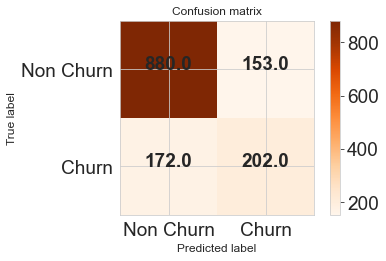

In [32]:
y_pred = rf_model.predict(X_test)
plot_confusion_matrix(confusion_matrix(y_test, y_pred=y_pred), classes=["Non Churn", "Churn"],title='Confusion matrix')

In [33]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.85      0.84      1033
         1.0       0.57      0.54      0.55       374

    accuracy                           0.77      1407
   macro avg       0.70      0.70      0.70      1407
weighted avg       0.77      0.77      0.77      1407



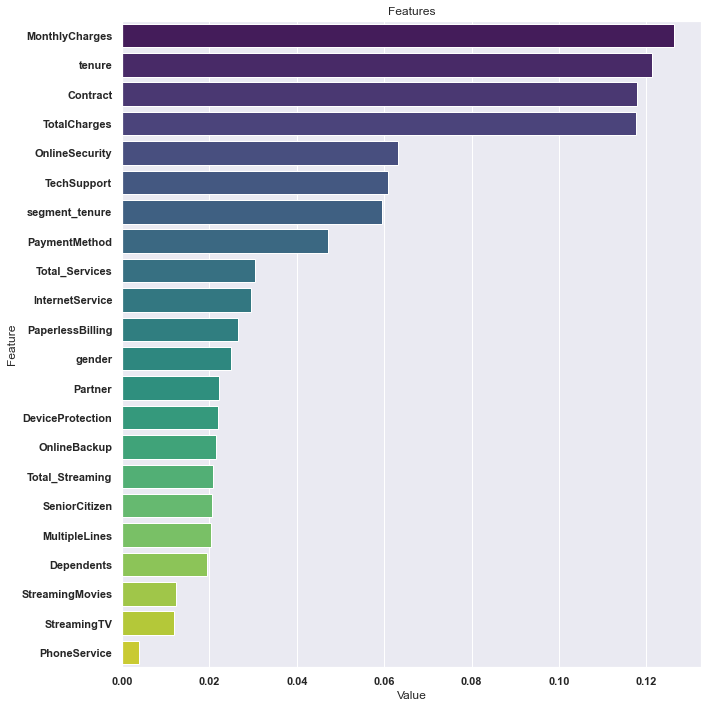

In [34]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num], palette="viridis")
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(rf_model, X)

<h2 id="--THANK-YOU-"><div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style="color:black">LightGBM</span></b> </div><a class="anchor-link" href="https://www.kaggle.com/code/mersaidylmaz/diabetes-predict-of-machine-learning#--THANK-YOU-" target="_self" rel=" noreferrer nofollow">¶</a></h2>

In [35]:
lgbm_model = best_models["LightGBM"].fit(X_train, y_train)
cv_result = cross_validate(lgbm_model,
                          X_train, y_train,
                          cv=10,
                          scoring=["accuracy", "f1", "roc_auc"])

print("Accuracy : ", cv_result["test_accuracy"].mean())
print("f1 : ", cv_result["test_f1"].mean())
print("roc auc :",cv_result["test_roc_auc"].mean())

[LightGBM] [Info] Number of positive: 4130, number of negative: 4130
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002282 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3480
[LightGBM] [Info] Number of data points in the train set: 8260, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 3717, number of negative: 3717
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001628 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3399
[LightGBM] [Info] Number of data points in the train set: 7434, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 3717, number of negative: 3717
[LightGBM] [Warning] Auto-choosing col-wise multi-thr

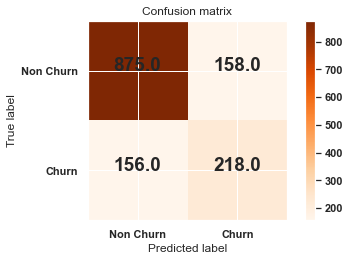

In [36]:
y_pred = lgbm_model.predict(X_test)
plot_confusion_matrix(confusion_matrix(y_test, y_pred=y_pred), classes=["Non Churn", "Churn"],title='Confusion matrix')

In [37]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.85      0.85      1033
         1.0       0.58      0.58      0.58       374

    accuracy                           0.78      1407
   macro avg       0.71      0.71      0.71      1407
weighted avg       0.78      0.78      0.78      1407



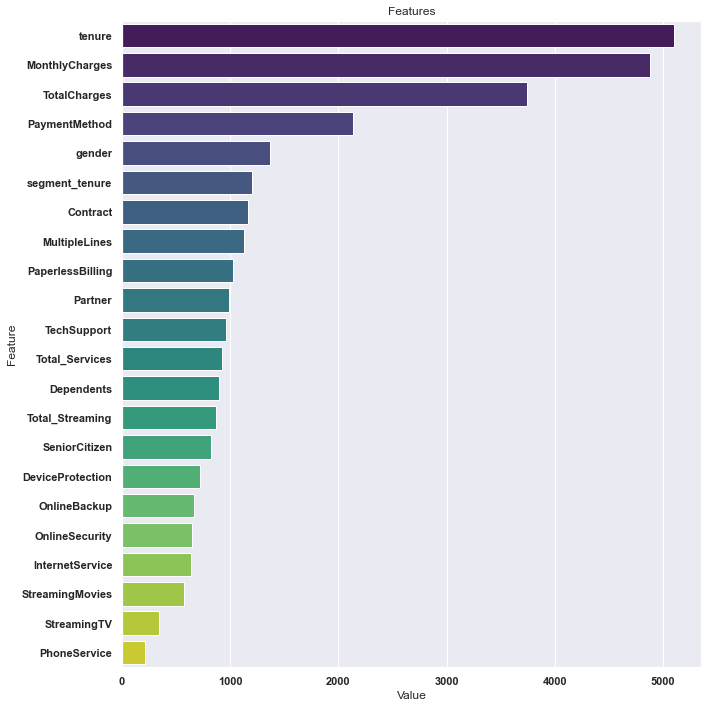

In [38]:
plot_importance(lgbm_model, X)


<h2 id="--THANK-YOU-"><div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style="color:black"> XGBoost</span></b> </div><a class="anchor-link" href="https://www.kaggle.com/code/mersaidylmaz/diabetes-predict-of-machine-learning#--THANK-YOU-" target="_self" rel=" noreferrer nofollow">¶</a></h2>

In [39]:
xg_model = best_models["XGBoost"].fit(X_train, y_train)
cv_result = cross_validate(xg_model,
                          X_train, y_train,
                          cv=10,
                          scoring=["accuracy", "f1", "roc_auc"])

print("Accuracy : ", cv_result["test_accuracy"].mean())
print("f1 : ", cv_result["test_f1"].mean())
print("roc auc :",cv_result["test_roc_auc"].mean())

Accuracy :  0.8598062953995157
f1 :  0.8533432823000087
roc auc : 0.9410986169819837


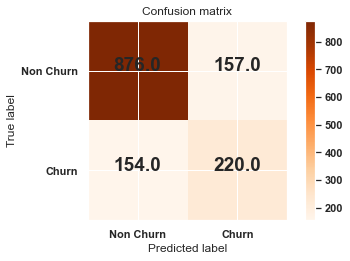

In [40]:
y_pred = xg_model.predict(X_test)
plot_confusion_matrix(confusion_matrix(y_test, y_pred=y_pred), classes=["Non Churn", "Churn"],title='Confusion matrix')

In [41]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.85      0.85      1033
         1.0       0.58      0.59      0.59       374

    accuracy                           0.78      1407
   macro avg       0.72      0.72      0.72      1407
weighted avg       0.78      0.78      0.78      1407



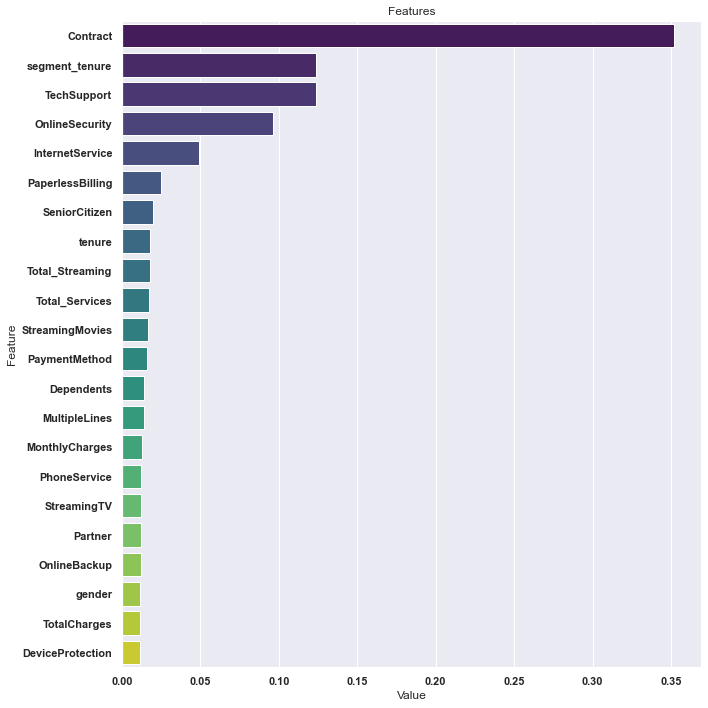

In [42]:
plot_importance(xg_model, X)

<h2 id="--THANK-YOU-"><div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style="color:black">KNN</span></b> </div><a class="anchor-link" href="https://www.kaggle.com/code/mersaidylmaz/diabetes-predict-of-machine-learning#--THANK-YOU-" target="_self" rel=" noreferrer nofollow">¶</a></h2>

In [43]:
knn_model = best_models["KNN"].fit(X_train, y_train)
cv_result = cross_validate(knn_model,
                          X_train, y_train,
                          cv=10,
                          scoring=["accuracy", "f1", "roc_auc"])

print("Accuracy : ", cv_result["test_accuracy"].mean())
print("f1 : ", cv_result["test_f1"].mean())
print("roc auc :",cv_result["test_roc_auc"].mean())

Accuracy :  0.8532687651331718
f1 :  0.8602522870437029
roc auc : 0.8905091194765754


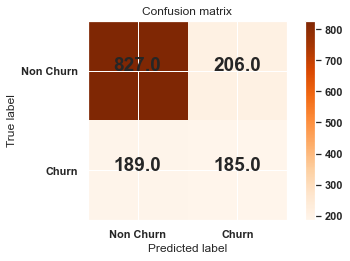

In [44]:
y_pred = knn_model.predict(X_test)
plot_confusion_matrix(confusion_matrix(y_test, y_pred=y_pred), classes=["Non Churn", "Churn"],title='Confusion matrix')

In [45]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.80      0.81      1033
         1.0       0.47      0.49      0.48       374

    accuracy                           0.72      1407
   macro avg       0.64      0.65      0.65      1407
weighted avg       0.72      0.72      0.72      1407



<h2 id="--THANK-YOU-"><div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style="color:black">CART</span></b> </div><a class="anchor-link" href="https://www.kaggle.com/code/mersaidylmaz/diabetes-predict-of-machine-learning#--THANK-YOU-" target="_self" rel=" noreferrer nofollow">¶</a></h2>

In [46]:
cart_model = best_models["CART"].fit(X_train, y_train)
cv_result = cross_validate(cart_model,
                          X_train, y_train,
                          cv=10,
                          scoring=["accuracy", "f1", "roc_auc"])

print("Accuracy : ", cv_result["test_accuracy"].mean())
print("f1 : ", cv_result["test_f1"].mean())
print("roc auc :",cv_result["test_roc_auc"].mean())

Accuracy :  0.8079903147699758
f1 :  0.8056408404922083
roc auc : 0.8261043917710721


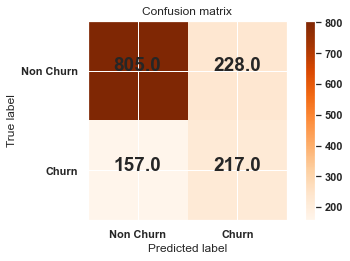

In [47]:
y_pred = cart_model.predict(X_test)
plot_confusion_matrix(confusion_matrix(y_test, y_pred=y_pred), classes=["Non Churn", "Churn"],title='Confusion matrix')

In [48]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.78      0.81      1033
         1.0       0.49      0.58      0.53       374

    accuracy                           0.73      1407
   macro avg       0.66      0.68      0.67      1407
weighted avg       0.74      0.73      0.73      1407



**Feature Importance**

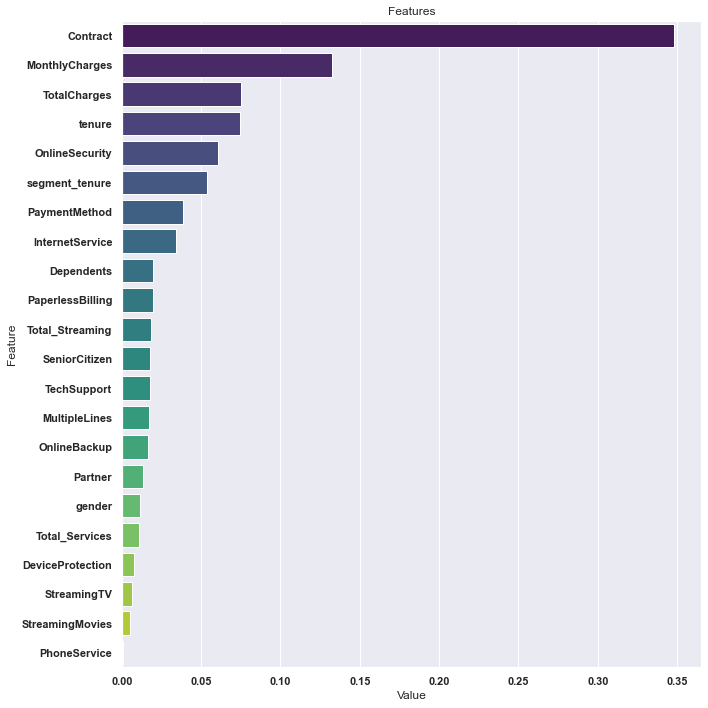

In [49]:
plot_importance(cart_model, X)

**Analyzing Model Complexity with Learning Curves**

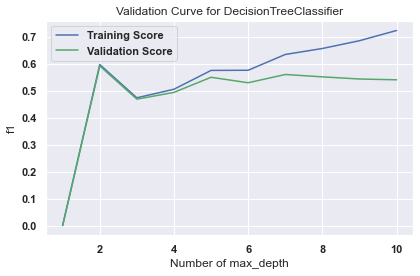

In [50]:
def val_curve_params(model, X, y, param_name, param_range, scoring="f1", cv=10):
    train_score, test_score = validation_curve(
        model, X=X, y=y, param_name=param_name, param_range=param_range, scoring=scoring, cv=cv)

    mean_train_score = np.mean(train_score, axis=1)
    mean_test_score = np.mean(test_score, axis=1)

    plt.plot(param_range, mean_train_score,
             label="Training Score", color='b')

    plt.plot(param_range, mean_test_score,
             label="Validation Score", color='g')

    plt.title(f"Validation Curve for {type(model).__name__}")
    plt.xlabel(f"Number of {param_name}")
    plt.ylabel(f"{scoring}")
    plt.tight_layout()
    plt.legend(loc='best')
    plt.show(block=True)


val_curve_params(cart_model, X, y, "max_depth", range(1, 11), scoring="f1")

**Extracting Decision Rules**

In [51]:
tree_rules = export_text(cart_model, feature_names=list(X.columns))
print(tree_rules[:1000])
print(".....................................................")
with open('tree_rules.txt', 'w') as file:
    file.write(tree_rules)

print("Tree rules have been saved to 'tree_rules.txt'")
print("You can examine the complete content in the txt file.")

|--- Contract <= 1.00
|   |--- OnlineSecurity <= -0.00
|   |   |--- segment_tenure <= 0.00
|   |   |   |--- InternetService <= -1.00
|   |   |   |   |--- SeniorCitizen <= 0.05
|   |   |   |   |   |--- Contract <= 0.01
|   |   |   |   |   |   |--- OnlineSecurity <= -0.45
|   |   |   |   |   |   |   |--- MonthlyCharges <= -0.10
|   |   |   |   |   |   |   |   |--- MonthlyCharges <= -0.10
|   |   |   |   |   |   |   |   |   |--- Total_Streaming <= 0.11
|   |   |   |   |   |   |   |   |   |   |--- MonthlyCharges <= -0.84
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |   |   |--- MonthlyCharges >  -0.84
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |--- Total_Streaming >  0.11
|   |   |   |   |   |   |   |   |   |   |--- TotalCharges <= -0.12
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- TotalCharges >  -

In [52]:
output_text = skompile(cart_model.predict).to('python/code')

partial_output = output_text[0:300]
print(partial_output)
print("..............................................")
with open("output_python.txt", "w") as f:
    f.write(output_text)

print("Output successfully saved to a file.")
print("You can examine the complete content in the txt file.")

(((((((((((0 if x[17] <= -0.8415476679801941 else ((0 if x[17] <= 
    -0.2192538008093834 else 1) if x[10] <= 0.0 else 0) if x[0] <= -0.5 else
    (0 if x[4] <= 0.31521739065647125 else 0) if x[2] <= 0.5 else 0) if x[
    21] <= 0.10844016075134277 else ((1 if x[3] <= 0.5 else 0) if x[18] <= 
    -
..............................................
Output successfully saved to a file.
You can examine the complete content in the txt file.


In [53]:
output_text = skompile(cart_model.predict).to('sqlalchemy/sqlite')

partial_output = output_text[0:300]
print(partial_output)
print("..............................................")
with open("output_sqlalchemy.txt", "w") as f:
    f.write(output_text)

print("Output successfully saved to a file.")
print("You can examine the complete content in the txt file.")

SELECT CASE WHEN (x15 <= 0.9999313652515411) THEN CASE WHEN (x9 <= -0.001981677021831274) THEN CASE WHEN (x20 <= 0.0005853424081578851) THEN CASE WHEN (x8 <= -0.9969152808189392) THEN CASE WHEN (x2 <= 0.04948835447430611) THEN CASE WHEN (x15 <= 0.013949012383818626) THEN CASE WHEN (x9 <= -0.44736376
..............................................
Output successfully saved to a file.
You can examine the complete content in the txt file.


**Prediction using Python Codes**

In [54]:
x = [-1.000,0.000,0.000,0.000,0.304,-1.000,0.000,-1.00,-0.500,-0.500,0.500,-0.500,0.500,0.500,0.000,0.000,-2.000,-0.392,0.200,0.000,-0.500,0.000]
def predict_with_rules(x):
    code = skompile(cart_model.predict).to('python/code')
    compiled_code = compile(code, '<string>', 'eval')
    result = eval(compiled_code, globals(), locals())
    return result

predict_with_rules(x)

0

**Saving and Loading Model**

In [55]:
import joblib
joblib.dump(cart_model, "cart_final.pkl")

cart_model_from_disc = joblib.load("cart_final.pkl")

cart_model_from_disc.predict(pd.DataFrame(x).T)

array([0.])